# Movie Recommendation System Project - Topic Modeling

### Importing packages

In [1]:
import numpy as np 
import pandas as pd 

from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn import preprocessing
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD, PCA 

from gensim import corpora, models, similarities, matutils

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

### Reading the CSV

In [2]:
movie_df = pd.read_csv('movie_model.csv')

## 1. Creating a topic modeling function

In [3]:
def make_topics(docs, preprocessor, vectorizer, topic_modeler, print_n_words=15):
    """A very simple pipeline."""
    
    # Apply preprocessor, vectorizer, and topic modeler
    if preprocessor is not None:
        docs = docs.apply(preprocessor)
    
    # Vectorize documents into a document-word matrix
    doc_word_vectors = vectorizer.fit_transform(docs)
    
    # Fit the topic model
    doc_topic_vectors = topic_modeler.fit_transform(doc_word_vectors)
    
    # Print the topics
    vocab = vectorizer.get_feature_names()
    for idx, topic in enumerate(topic_modeler.components_):
        # Select the top 15 words in vocab for this topic
        top_words = [vocab[i].upper() for i in topic.argsort()[:-print_n_words-1:-1]]
        print(f"Topic {idx}:\n", ", ".join(top_words), "\n")
    
    return doc_topic_vectors

### Function to print wordcloud

In [10]:
def wordcloud_topic(topics, index, docs):
    words = ""
    
    for i, doc in enumerate(topics):
        main_topic = np.argsort(-doc)[0]
        if main_topic == index:
            words += docs[i]
            
    wordcloud = WordCloud(stopwords=my_stop_words, max_font_size=180,width=1600, 
                          height=1200, background_color="white").generate(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    wordcloud.to_file('testplot3.png')

## 2. Creating a baseline topic model with 10 topics

In [6]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['film'])
docs = movie_df['Plot modeling']
preprocessor = None
vectorizer = TfidfVectorizer(stop_words=my_stop_words)
topic_modeler = NMF(10, random_state=10, max_iter=1000)  # NOTE: I use a random state here to make the results deterministic.

make_topics(docs, preprocessor, vectorizer, topic_modeler);

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Topic 0:
 TELL, LEAVE, HOUSE, HOME, SAY, NIGHT, ASK, DAY, CAR, ROOM, RETURN, TRY, MEET, PARTY, FRIEND 

Topic 1:
 FATHER, SON, MOTHER, DAUGHTER, BOY, YEAR, HOME, DIE, LIVE, PARENT, OLD, CHILD, KILL, LEAVE, DEATH 

Topic 2:
 KILL, POLICE, MURDER, OFFICER, KILLER, CASE, ARREST, CRIME, SHOOT, DEATH, ESCAPE, DRUG, SUSPECT, CRIMINAL, DEAD 

Topic 3:
 KILL, SHIP, ATTACK, ESCAPE, MEN, SOLDIER, GROUP, USE, CREW, DESTROY, ORDER, FORCE, CAPTURE, RESCUE, FIGHT 

Topic 4:
 LOVE, MARRY, FALL, MARRIAGE, FRIEND, GIRL, MEET, STORY, COME, SISTER, WEDDING, WANT, DAUGHTER, KNOW, COLLEGE 

Topic 5:
 SCHOOL, PLAY, STUDENT, TEAM, GAME, WIN, TEACHER, FRIEND, PLAYER, HIGH, LIFE, GIRL, COLLEGE, STAR, BAND 

Topic 6:
 WIFE, CHILD, HUSBAND, WOMAN, LIFE, YOUNG, MAN, BABY, AFFAIR, YEAR, LIVE, COUPLE, DAUGHTER, OLD, DOCTOR 

Topic 7:
 MONEY, GANG, TOWN, BANK, STEAL, ROBBERY, HORSE, ROB, JOB, PAY, PLAN, MEN, WORK, CAR, THIEF 

Topic 8:
 VILLAGE, VILLAGER, CITY, COME, STORY, PEOPLE, TEMPLE, LAND, FORM, LANDLORD, LOCA

### 2.1 Creating a model with 15 topics

In [7]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['film'])
docs = movie_df['Plot modeling']
preprocessor = None
vectorizer = TfidfVectorizer(stop_words=my_stop_words)
topic_modeler = NMF(15, random_state=10, max_iter=1000)  # NOTE: I use a random state here to make the results deterministic.

make_topics(docs, preprocessor, vectorizer, topic_modeler);

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Topic 0:
 TELL, LEAVE, HOUSE, HOME, NIGHT, SAY, ASK, CAR, DAY, ROOM, RETURN, PARTY, TRY, AWAY, ARRIVE 

Topic 1:
 FATHER, SON, DAUGHTER, YEAR, KILL, DIE, HOME, BOY, MAN, MARRY, KNOW, LAW, YOUNG, WANT, TELL 

Topic 2:
 POLICE, KILL, MURDER, KILLER, OFFICER, CASE, ARREST, CRIME, SHOOT, DEATH, ESCAPE, SUSPECT, DRUG, BODY, DEAD 

Topic 3:
 KILL, SHIP, ATTACK, ESCAPE, SOLDIER, GROUP, MEN, USE, CREW, DESTROY, ORDER, FORCE, CAPTURE, ISLAND, RESCUE 

Topic 4:
 LOVE, MARRY, FALL, MARRIAGE, FRIEND, GIRL, MEET, COME, DAUGHTER, WEDDING, WANT, KNOW, STORY, SISTER, COLLEGE 

Topic 5:
 SCHOOL, STUDENT, TEACHER, GIRL, COLLEGE, FRIEND, HIGH, CLASS, BOY, YEAR, PARENT, OLD, LIFE, STUDY, PRINCIPAL 

Topic 6:
 WOMAN, HUSBAND, WIFE, LIFE, MAN, YOUNG, STORY, AFFAIR, RELATIONSHIP, OLD, YEAR, WORK, LIVE, COUPLE, BEGIN 

Topic 7:
 MONEY, BANK, JOB, STEAL, PAY, WORK, PLAN, MAKE, BUSINESS, SELL, COMPANY, HORSE, BUY, RACE, OFFER 

Topic 8:
 VILLAGE, VILLAGER, CITY, STORY, COME, PEOPLE, TEMPLE, LAND, FORM, LANDLORD

### 2.2 Creating a model with more stop words 

In [9]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['film','say','tell','want','know'])
docs = movie_df['Plot modeling']
preprocessor = None
vectorizer = TfidfVectorizer(stop_words=my_stop_words)
topic_modeler = NMF(15, random_state=10, max_iter=1000)  # NOTE: I use a random state here to make the results deterministic.

make_topics(docs, preprocessor, vectorizer, topic_modeler);

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Topic 0:
 HOUSE, LEAVE, HOME, NIGHT, CAR, ASK, DAY, ROOM, RETURN, PARTY, TRY, FRIEND, RUN, AWAY, MEET 

Topic 1:
 LOVE, MARRY, FALL, MARRIAGE, FRIEND, GIRL, MEET, COME, WEDDING, DAUGHTER, SISTER, COLLEGE, DAY, DECIDE, RICH 

Topic 2:
 KILL, POLICE, MURDER, KILLER, OFFICER, CASE, ARREST, CRIME, SHOOT, DEATH, MAN, SUSPECT, ESCAPE, DETECTIVE, DEAD 

Topic 3:
 SHIP, KILL, ATTACK, ESCAPE, CREW, SOLDIER, GROUP, USE, DESTROY, ORDER, ISLAND, CAPTURE, FORCE, RESCUE, MEN 

Topic 4:
 FATHER, SON, MOTHER, DAUGHTER, YEAR, BOY, HOME, DIE, LIVE, OLD, COME, YOUNG, DEATH, LEAVE, PARENT 

Topic 5:
 SCHOOL, STUDENT, TEACHER, GIRL, COLLEGE, HIGH, CLASS, FRIEND, BOY, PARENT, YEAR, STUDY, PRINCIPAL, OLD, TEACH 

Topic 6:
 LIFE, STORY, PLAY, MOVIE, YOUNG, WOMAN, ROLE, CHARACTER, STAR, MAN, WORK, LEAD, RELATIONSHIP, MUSIC, BAND 

Topic 7:
 MONEY, BANK, JOB, STEAL, PAY, WORK, PLAN, BUSINESS, MAKE, COMPANY, SELL, OFFER, BUY, ROBBERY, ROB 

Topic 8:
 VILLAGE, VILLAGER, CITY, COME, PEOPLE, STORY, TEMPLE, LAND, FO

### 2.3 Creating a model with 20 topics

In [9]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['film','say','tell','want','know'])
docs = movie_df['Plot modeling']
preprocessor = None
vectorizer = TfidfVectorizer(stop_words=my_stop_words)
topic_modeler = NMF(20, random_state=10, max_iter=1000)  # NOTE: I use a random state here to make the results deterministic.

make_topics(docs, preprocessor, vectorizer, topic_modeler);

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Topic 0:
 HOUSE, HOME, NIGHT, DAY, FRIEND, PARTY, ROOM, RETURN, TIME, LEAF, APARTMENT, LEAVE, MEET, BEGIN, MAKE 

Topic 1:
 LOVE, FALL, MARRIAGE, MARRY, MARRIED, FRIEND, WEDDING, MEET, DAUGHTER, COME, COLLEGE, SISTER, WANT, KNOW, DAY 

Topic 2:
 POLICE, OFFICER, DRUG, CRIMINAL, ARREST, ESCAPE, COP, JAIL, ARRESTED, INSPECTOR, STATION, KILL, CRIME, TERRORIST, MEN 

Topic 3:
 SHIP, CREW, SOLDIER, ESCAPE, ATTACK, GROUP, ISLAND, MEN, WAR, BRITISH, MISSION, GERMAN, JAPANESE, KILL, BATTLE 

Topic 4:
 FATHER, MOTHER, HOME, DAUGHTER, LIFE, YEAR, OLD, PARENT, DEATH, YOUNG, DIED, UNCLE, MEET, MAN, RETURN 

Topic 5:
 SCHOOL, STUDENT, TEACHER, COLLEGE, HIGH, CLASS, FRIEND, PARENT, YEAR, BOY, PRINCIPAL, CLASSMATE, STUDY, DANCE, GROUP 

Topic 6:
 MURDER, KILL, KILLER, DEATH, CASE, BODY, KILLED, MURDERED, CRIME, DEAD, MAN, SUSPECT, KILLING, DETECTIVE, VICTIM 

Topic 7:
 HUSBAND, WIFE, WOMAN, MAN, YOUNG, AFFAIR, MARRIED, COUPLE, DIVORCE, HAVING, LIFE, RELATIONSHIP, WEALTHY, LOVER, MARRIAGE 

Topic 8:
 

### 2.4 Creating a model with 30 topics

In [4]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['film','say','tell','want','know', 'ask', 'live', 'life', 's'])
docs = movie_df['Plot modeling']
preprocessor = None
vectorizer = TfidfVectorizer(stop_words=my_stop_words)
topic_modeler = NMF(30, random_state=10, max_iter=1000)  # NOTE: I use a random state here to make the results deterministic.

topics = make_topics(docs, preprocessor, vectorizer, topic_modeler);

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Topic 0:
 LEAVE, HOME, NIGHT, WORK, DAY, RETURN, MEET, APARTMENT, MAKE, TIME, PARTY, RELATIONSHIP, BEGIN, JOB, ROOM 

Topic 1:
 LOVE, MARRY, FALL, MARRIAGE, DAUGHTER, WEDDING, MEET, SISTER, COME, RICH, MARRIED, LOVER, DECIDE, ACCEPT, PARENT 

Topic 2:
 KILL, SHOOT, MEN, DEATH, GUN, ATTACK, ESCAPE, REVEAL, DEAD, HENCHMAN, SAVE, REVENGE, FIGHT, TRY, ASSASSIN 

Topic 3:
 ALIEN, USE, POWER, HUMAN, DESTROY, ATTACK, WORLD, GROUP, MONSTER, ESCAPE, CREATURE, FIGHT, BATTLE, DEFEAT, VAMPIRE 

Topic 4:
 FATHER, HOME, DAUGHTER, PARENT, UNCLE, FIGHT, WISH, LEARN, REFUSE, HELP, RETURN, DIE, REVEAL, STEPMOTHER, YEAR 

Topic 5:
 SCHOOL, STUDENT, TEACHER, HIGH, COLLEGE, CLASS, PRINCIPAL, PARENT, STUDY, TEACH, YEAR, CLASSMATE, ATTEND, DANCE, GRADUATE 

Topic 6:
 MONEY, BANK, STEAL, PAY, JOB, PLAN, WORK, SELL, BUSINESS, MAKE, DEBT, ROB, BUY, MILLION, CASH 

Topic 7:
 MURDER, KILLER, CASE, SUSPECT, CRIME, DETECTIVE, INVESTIGATE, COMMIT, VICTIM, DEATH, MURDERER, BODY, INVESTIGATION, EVIDENCE, WITNESS 

Top

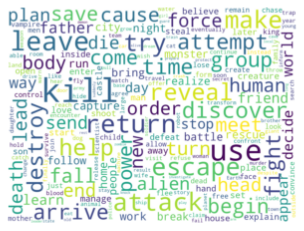

In [93]:
wordcloud_topic(topics, index=3, docs=movie_df['Plot modeling'].str.replace("'", ''))

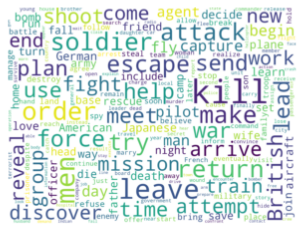

In [11]:
wordcloud_topic(topics, index=27, docs=movie_df['Plot modeling'].str.replace("'", ''))

### 2.5 Creating a model with TruncatedSVD

In [10]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['film','say','tell','want','know', 'ask', 'live', 'life'])
docs = movie_df['Plot modeling']
preprocessor = None
vectorizer = TfidfVectorizer(stop_words=my_stop_words)
topic_modeler = TruncatedSVD(30, random_state=10)  # NOTE: I use a random state here to make the results deterministic.

make_topics(docs, preprocessor, vectorizer, topic_modeler);

Topic 0:
 KILL, LOVE, FATHER, LEAVE, FAMILY, FRIEND, COME, MOTHER, HOUSE, MAKE, MARRY, SON, TRY, MEET, HOME 

Topic 1:
 LOVE, MARRY, FAMILY, FATHER, MARRIAGE, MOTHER, SON, DAUGHTER, VILLAGE, FALL, GIRL, SISTER, STORY, PARENT, CHILD 

Topic 2:
 KILL, BROTHER, VILLAGE, POLICE, SON, MURDER, GANG, FATHER, FAMILY, DAUGHTER, SISTER, OFFICER, MARRY, ARREST, JAIL 

Topic 3:
 POLICE, MURDER, MONEY, CAR, HOUSE, GANG, APARTMENT, KILLER, CRIME, CASE, DRUG, HUSBAND, DETECTIVE, ARREST, BANK 

Topic 4:
 LOVE, FALL, GANG, FRIEND, STORY, MARRY, PLAY, GIRL, MONEY, TEAM, COLLEGE, WIN, POLICE, MEET, MOVIE 

Topic 5:
 SCHOOL, FATHER, TEAM, GANG, STUDENT, BROTHER, GAME, PLAY, FAMILY, TEACHER, BOY, COLLEGE, WIN, MOTHER, SON 

Topic 6:
 MONEY, FAMILY, BANK, TOWN, GANG, SON, HORSE, JOB, BROTHER, STEAL, MARRY, PAY, MEN, BUSINESS, WIFE 

Topic 7:
 WIFE, MURDER, PLAY, HUSBAND, STORY, WOMAN, YOUNG, SON, CHILD, MAN, FAMILY, ROLE, TEAM, CASE, LEAD 

Topic 8:
 VILLAGE, VILLAGER, MONEY, HOUSE, TOWN, GIRL, STORY, COME,

### TruncatedSVD does not seem to work as well as NMF ('GANG', for example, appears in many topics), so will stick with NMF